Another example is when we try to determine whether temperature and pressure affect the results on a given property and we test low and high values of temperature and pressure, that means we have 4 factors.

It is a common mistake from experimenters to use multiple T tests between each pair of factors and observe the values of p to see which differences are significant.

That is not a valid approach that can also miss *interactions* between the factors.

Just as for simple comparative tests we will need multiple samples as it is impossible to have the exact same formulation or even measurement each time, so the test is allowing to tell if that difference is **significant** or not despite this existing variability. 

If we cannot conclude there is a difference we will only be able to say **no factor causes significantly different outputs**.

The test will be able to conclude that if there **is** a significant difference what is the value of **p that is the $\alpha$ or type-I error** that quantifies the probability that we are wrong in saying there is a difference on any specific pair of factors.

And we will have an idea of how they are inter-related.

## CASE

We have a contrast agent (CA) that when it is combined with a specific biological probe we expect it to attach to cancer cells and change the intensity of the images we acquired from a magnetic resonance imaging scanner. 

Because the CA also attaches partially to cancer cells without the probe, we are unsure if the biological probe may change the intensity of the image, the CA combined with non-specific biological probe may also attach to cancer cells and change the intensity ...

We find ourselves with a case where multiple factors need to be analysed.

## CASE

* The contrast agent alone
* The new biological probe alone
* The contrast agent + biological probe
* A sham treatment with no agent or probe
* A non-specific probe alone
* A non-specific probe + contrast agent

## Model

1. We have **6 input factors** (CA, Specific Probe, CA + Specific Probe, Sham, Non-specific Probe, Non-specific Probe + CA)
2. We measure as our **output factor** the intensity
3. We have some **controllable factors**: MRI used for imaging, same operator, female mice 20 weeks old with similar sizes tumours, contrast agent batch, ...
4. We have some **uncontrollable factors**: room temperature when injecting, animal activity levels, development of the tumour may vary...

**Is the intensity in the image affected by any or some of the factors?**

*When solving your assignment case, you will need to determine at least 3 possible controllable and uncontrollable factors that could affect your experiments*


## Randomization

The first step for this experiment is that the imaging should be done randomly. Why? 

*Let's imagine we started by testing our new conjugate...*

* If there were issues with the MRI that day, we could detect a difference that is caused by this problem, not by the conjugate
* If the tumour model was changing response over time we could detect a difference caused by this fact and not the conjugates that we used
* If we made a mistake in the acquisition that day we may not detect changes that were there because it was all run the day this error was made

*When solving your assignment case, you will need to determine at least 3 possible scenarios that could affect your experiment if you did not randomize the measurements*

We will use again a list of codes for each test (6 factors x 5 animals each = 30 experiments) and randomize that list (example coded here).

In [22]:
# We need to import different packages that will allow to do math,
# lineal algebra, numerical operations,
# array operations and plotting

import scipy as Sci
import numpy as np
import random as rd  #this is the random package in Python

Code=['SP+CA Animal 1', 'SP+CA Animal 2', 'SP+CA Animal 3', 'SP+CA Animal 4', 'SP+CA Animal 5', 
      'CA Animal 1', 'CA Animal 2', 'CA Animal 3', 'CA Animal 4', 'CA Animal 5', 
      'NS+CA Animal 1', 'NS+CA Animal 2', 'NS+CA Animal 3', 'NS+CA Animal 4', 'NS+CA Animal 5', 
      'S Animal 1', 'S Animal 2', 'S Animal 3', 'S Animal 4', 'S Animal 5', 
      'NS Animal 1', 'NS Animal 2', 'NS Animal 3', 'NS Animal 4', 'NS Animal 5', 
      'Sham Animal 1', 'Sham Animal 2', 'Sham Animal 3', 'Sham Animal 4', 'Sham Animal 5'];

rd.shuffle(Code)

print('Conduct the measurements in the following order:')
print(Code)   #every run of this code will give you a different result

Conduct the measurements in the following order:
['NS+CA Animal 5', 'NS Animal 3', 'S Animal 1', 'Sham Animal 1', 'NS+CA Animal 4', 'SP+CA Animal 5', 'NS+CA Animal 3', 'SP+CA Animal 4', 'CA Animal 2', 'SP+CA Animal 3', 'S Animal 2', 'S Animal 4', 'SP+CA Animal 1', 'S Animal 3', 'Sham Animal 5', 'NS Animal 2', 'CA Animal 1', 'NS Animal 4', 'SP+CA Animal 2', 'Sham Animal 4', 'NS+CA Animal 2', 'Sham Animal 2', 'NS Animal 5', 'CA Animal 5', 'S Animal 5', 'Sham Animal 3', 'CA Animal 4', 'CA Animal 3', 'NS+CA Animal 1', 'NS Animal 1']


We have measured the intensity following the order determined randomly before. The results are given in a table.

Treatment     | 1   | 2   | 3   | 4   | 5   |
------------- |---- |---- |---- |---- |---- |
CA + S Probe  | 686 | 675 | 688 | 677 | 687 |
CA            | 698 | 692 | 698 | 693 | 704 |
CA + NS Probe | 701 | 694 | 705 | 696 | 709 |
S Probe       | 713 | 709 | 717 | 710 | 707 |
NS Probe      | 718 | 714 | 715 | 717 | 709 |
Sham          | 711 | 709 | 710 | 712 | 710 |

In [23]:
IntensitySPCA=[686,675,688,677,687] #SP + CA
IntensityCA  =[698,692,698,693,704] #CA
IntensityNSCA=[701,694,705,696,709] #CA+NS Probe
IntensitySP  =[713,709,717,710,707] #S Probe
IntensityNS  =[718,714,715,717,709] #NS Probe
IntensitySham=[711,709,710,712,710] #Sham

## Visualizing your data

Before running a comparative test you always need to visualize your data to determine if there are any outliers you should take care of and have an idea of your spread.

You will also need to evaluate the validity of your test, the comparative test for multifactors ANOVA (analysis of variances) will only be accurate on data that is normally distributed.

**Note** that you can always run a  test on data that is not normal, that only means your results **cannot** be used, but the test will run and you will draw a conclusion that may not be valid.

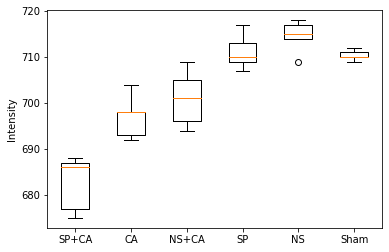

In [24]:
%matplotlib inline

# We need to import plotting packages
import matplotlib.pyplot as plt

plt.boxplot([IntensitySPCA, IntensityCA, IntensityNSCA, IntensitySP, IntensityNS, IntensitySham])
plt.xticks([1, 2, 3, 4, 5, 6], ['SP+CA','CA', 'NS+CA', 'SP', 'NS', 'Sham'])
plt.ylabel('Intensity')
plt.show()

In [13]:
HistologyA=[1.08,1.08,1.02,1.06]
HistologyB=[1.05,1.03,1.10,1.14]
HistologyC=[1.13,1.15,1.11,1.15]
HistologyD=[0.75,0.79,0.71,0.74]
HistologyE=[1.35,1.27,1.30,1.27]

LumenA=[14.2,14.1,14.1,14.3]
LumenB=[14.1,14.2,14.3,14.5]
LumenC=[14.8,14.5,14.8,14.7]
LumenD=[15.7,15.9,15.7,15.6]
LumenE=[15.5,15.4,15.5,15.7]

InnerA=[5.8,5.5,5.8,5.7]
InnerB=[5.1,5.2,5.3,5.5]
InnerC=[5.2,4.1,5.1,5.3]
InnerD=[5.6,5.9,5.7,5.7]
InnerE=[5.5,5.4,5.5,5.8]

StrainA=[0.88,0.95,0.87,0.76]
StrainB=[0.51,0.62,0.53,0.65]
StrainC=[0.42,0.31,0.41,0.43]
StrainD=[0.77,0.99,0.75,0.71]
StrainE=[0.53,0.54,0.55,0.57]

OuterInnerA=[1.18,1.58,1.82,1.76]
OuterInnerB=[1.15,1.23,1.33,1.54]
OuterInnerC=[1.23,1.15,1.15,1.25]
OuterInnerD=[0.75,0.69,0.74,0.73]
OuterInnerE=[1.45,1.24,1.35,1.47]

from outliers import smirnov_grubbs as grubbs

ns_out=grubbs.max_test_outliers(LumenA, alpha=0.05)
print(ns_out)

[14.3, 14.2]


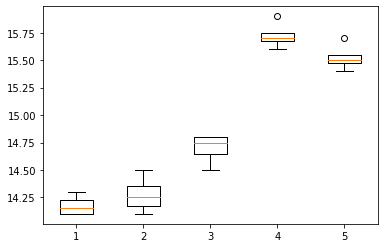

In [5]:
%matplotlib inline

# We need to import plotting packages
import matplotlib.pyplot as plt

plt.boxplot([LumenA,LumenB,LumenC,LumenD,LumenE])
#plt.boxplot([HistologyA,HistologyB,HistologyC,HistologyD,HistologyE])
#plt.boxplot([InnerA,InnerB,InnerC,InnerD,InnerE])
#plt.boxplot([StrainA,StrainB,StrainC,StrainD,StrainE])
#plt.boxplot([OuterInnerA,OuterInnerB,OuterInnerC,OuterInnerD,OuterInnerE])
plt.show()

In [23]:
IntensitySPCA=[686,675,688,677,687] #SP + CA
IntensityCA  =[698,692,698,693,704] #CA
IntensityNSCA=[701,694,705,696,709] #CA+NS Probe
IntensitySP  =[713,709,717,710,707] #S Probe
IntensityNS  =[718,714,715,717,709] #NS Probe
IntensitySham=[711,709,710,712,710] #Sham

We note that we have an outlier on the non specific probe samples. After inspection of such sample we realize that it is a typo and the value was 719 so we amend the data and plot again.

### Activity 1 - Copy the code above to modify your outlier and obtain your new boxplot
### Activity 2 - Modify the vertical label to add the units (a.u.)

## Checking for Normality

We need to make sure that our data is normally distributed or we won't be able to use an ANOVA test. Remember, a test will always run but that does not mean it is the right test to use. 

To check for normality we use plot the probability plot of the sample data against the quantiles of a specified theoretical distribution, in our case, the **normal distribution**. 

A normal distribution is the typical bell-shaped "curve" where we have a high probability of something being at the *average* with larger and smaller values equally distributed in this bell shape towards lower and higher values. If we have any kind of skewed response (too many values high or too many low), it is no longer normal.

<img src="files/NormalDistribution.png" alt="NormalDistribution" width="600"/>

A normality plot generates the data plotted against a theoretical normal distribution in such a way that the points should form an approximate straight line if they are indeed normally distributed. 

<img src="files/NormalityTestNormal.png" alt="NormalityTestNormal" width="500"/>

Departures from this straight line indicate departures from normality. If the data is skewed, we observe many points at higher or lower values from the mean have an abnormally high or low probability and therefore the shape is no longer a bell.

<img src="files/NormalityTestSkewed.png" alt="NormalityTestSkewed" width="1200"/>

In [26]:
from scipy import stats #this will be used to obtain probability plots

#define ticks in probability
ticks_perc=[0.01, 0.05, 0.10, 0.20, 0.50, 0.80, 0.90, 0.95, 0.99]
#transfrom them from precentile to cumulative density
ticks_quan=[stats.norm.ppf(i) for i in ticks_perc]

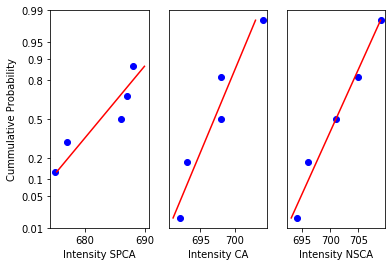

In [27]:
# Calculate quantiles and least-square-fit curve
(quantiles, values), (slope, intercept, r) = stats.probplot(IntensitySPCA, dist='norm')
plt.subplot(131) ; plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r')
plt.yticks(ticks_quan,ticks_perc) ; plt.xlabel('Intensity SPCA') ; plt.ylabel('Cummulative Probability') 

(quantiles, values), (slope, intercept, r) = stats.probplot(IntensityCA, dist='norm')
plt.subplot(132) ; plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r') 
plt.yticks([]) ; plt.xlabel('Intensity CA') 

(quantiles, values), (slope, intercept, r) = stats.probplot(IntensityNSCA, dist='norm')
plt.subplot(133) ; plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r') 
plt.yticks([]) ; plt.xlabel('Intensity NSCA') ; plt.show()

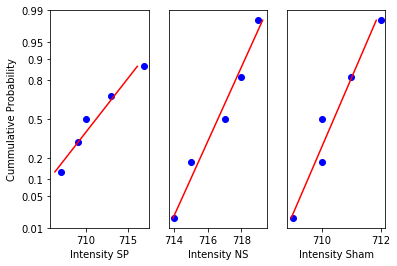

In [28]:
(quantiles, values), (slope, intercept, r) = stats.probplot(IntensitySP, dist='norm')
plt.subplot(131) ; plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r')
plt.yticks(ticks_quan,ticks_perc) ; plt.xlabel('Intensity SP') ; plt.ylabel('Cummulative Probability') 

(quantiles, values), (slope, intercept, r) = stats.probplot(IntensityNS, dist='norm')
plt.subplot(132) ; plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r') 
plt.yticks([]) ; plt.xlabel('Intensity NS') 

(quantiles, values), (slope, intercept, r) = stats.probplot(IntensitySham, dist='norm')
plt.subplot(133) ; plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r') 
plt.yticks([]) ; plt.xlabel('Intensity Sham') ; plt.show()

We can run a test that will give us the significance value for a probability that the data is normal. The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. If the p<0.05 we reject the hypothesis and therefore the data is *likely not* normal.

If the value of p>0.05 then we *cannot reject* the hypothesis that the data is normal and we can then say that we are able to use tests that require a normal distribution of the data.

In [29]:
[ShapiroTestS, pShapiroSP] = stats.shapiro(IntensitySP)
print(pShapiroSP)
[ShapiroTestS, pShapiroNS] = stats.shapiro(IntensityNS)
print(pShapiroNS)
[ShapiroTestS, pShapiroCA] = stats.shapiro(IntensityCA)
print(pShapiroCA)
[ShapiroTestS, pShapiroNSCA] = stats.shapiro(IntensityNSCA)
print(pShapiroNSCA)
[ShapiroTestS, pShapiroSPCA] = stats.shapiro(IntensitySPCA)
print(pShapiroSPCA)
[ShapiroTestS, pShapiroSham] = stats.shapiro(IntensitySham)
print(pShapiroSham)

if (pShapiroSP>0.05 and pShapiroNS>0.05 and pShapiroCA>0.05 and pShapiroNSCA>0.05 and pShapiroSPCA>0.05 and pShapiroSham>0.05) : print('The data is normal')

0.7583246827125549
0.753976047039032
0.5075986385345459
0.7890633940696716
0.11462920904159546
0.8139703869819641
The data is normal


**Both the normality plot and the Shapiro-Wilk test are telling us that the data is likely normal**

Therefore the mean and standard deviation can be used to represent our data.

In [30]:
print('The average intensity using a non specific probe is: ',np.mean(IntensityNS),u"\u00B1",np.std(IntensityNS))
print('The average intensity using a specific probe is: ',np.mean(IntensitySP),u"\u00B1",np.std(IntensitySP))
print('The average intensity using a non specific probe + contrast agent is: ',np.mean(IntensityNSCA),u"\u00B1",np.std(IntensityNSCA))
print('The average intensity using a specific probe + contrast agent is: ',np.mean(IntensitySPCA),u"\u00B1",np.std(IntensitySPCA))
print('The average intensity using a constrast agent is: ',np.mean(IntensityCA),u"\u00B1",np.std(IntensityCA))
print('The average intensity using a sham is: ',np.mean(IntensitySham),u"\u00B1",np.std(IntensitySham))

The average intensity using a non specific probe is:  716.6 ± 1.8547236990991407
The average intensity using a specific probe is:  711.2 ± 3.4871191548325386
The average intensity using a non specific probe + contrast agent is:  701.0 ± 5.549774770204643
The average intensity using a specific probe + contrast agent is:  682.6 ± 5.4626001134990645
The average intensity using a constrast agent is:  697.0 ± 4.2895221179054435
The average intensity using a sham is:  710.4 ± 1.019803902718557


## Hypothesis Testing

The averages are quite close and the question now is: **are there any pair that is significantly different to another?** 

This means then that there is indeed an effect observed for that group and it is separate from the others.

By just using an "average $\pm$ std" approach with so many factors it is hard to make this conclusion and it would not be accurate or provide enough information about how conclusive a difference is.

We will use then an analysis of variance (ANOVA) test.

If we consider that the average of a population is $\mu_i=\mu+\tau_i$ with $\mu$ being the same for all factors.

We test the hypothesis that this $\tau_i$ is non-existent for all the factors $\tau_1=\tau_2=...\tau_i=0$ with $i$ being the number of factors. If we reject that hypothesis then we know there is at least one factor where the population has a different mean and therefore the alternative hypothesis $H_1$ is valid.

$$H_0: \tau_1 = \tau_2 = \tau_3= \tau_4= \tau_5= \tau_6=0$$
$$H_1: \tau_i \neq 0 ; \text{for at least one i}$$

**We will reject the null hypothesis $H_0$ if p<0.05**

This means that there is less than 5% chance we made a mistake in rejecting the hypothesis and therefore we are quite certain that at least one group is different.

The simplest function to perform a 1-way ANOVA (testing if any group is different) in Python is in the stats package. We can perform the test but it will only determine that we have at least one group different.

In [31]:
F,p=stats.f_oneway(IntensityNS,IntensitySP,IntensityNSCA,IntensitySPCA,IntensityCA,IntensitySham)

print('The p for the comparative test among all of the treatments is', p)

The p for the comparative test among all of the treatments is 1.1287524524037503e-10


We can clearly see with a p<<0.001 that this is significant and therefore we **reject** the hypothesis that all the factors give the same intensity.

The alternative hypothesis is then accepted and there is **at least one group different to the others**

The p gives us a value of the probability that we made a mistake in this rejection. We are quite certain that we did not because the p is very low.

We need now to determine which is the group that is different.

The value of p<<0.001 tells us that at least one group is different, but which?

For that, we can use a **multi compare** that is obtained from a **Tukey honestly significant difference** or **Tukey HSD** test. This will do pair combinations and give a significance value.

We will need first to create a specific structure for our data and for that we will introduce a dataframe from the panda package.

In [62]:
import pandas as pd

# Put into dataframe
dta2 = np.rec.array([
    (  1,  'specific+CA',  IntensitySPCA[0]), (  2,  'specific+CA',  IntensitySPCA[1]), 
    (  3,  'specific+CA',  IntensitySPCA[2]), (  4,  'specific+CA',  IntensitySPCA[3]), (  5,  'specific+CA',  IntensitySPCA[4]), 
    (  6,   'specific',  IntensitySP[0] ), (  7,   'specific',  IntensitySP[1] ),
    (  8,   'specific',  IntensitySP[2] ), (  9,   'specific',  IntensitySP[3] ), ( 10,   'specific',  IntensitySP[4] ),
    ( 11, 'non-specific+CA',  IntensityNSCA[0] ),  ( 12, 'non-specific+CA',  IntensityNSCA[1] ),
    ( 13, 'non-specific+CA',  IntensityNSCA[2] ),  ( 14, 'non-specific+CA',  IntensityNSCA[3] ), ( 15, 'non-specific+CA',  IntensityNSCA[4] ),
    ( 16, 'non-specific',  IntensityNS[0]  ), ( 17, 'non-specific',  IntensityNS[1]  ),
    ( 18, 'non-specific',  IntensityNS[2]  ), ( 19, 'non-specific',  IntensityNS[3]  ), ( 20, 'non-specific',  IntensityNS[4]  ),
    ( 21, 'CA',  IntensityCA[0] ), ( 22, 'CA',  IntensityCA[1] ),
    ( 23, 'CA',  IntensityCA[2] ), ( 24, 'CA',  IntensityCA[3] ), ( 25, 'CA',  IntensityCA[4] ),
    ( 26, 'Sham',  IntensitySham[0] ), ( 27, 'Sham',  IntensitySham[1] ),
    ( 28, 'Sham',  IntensitySham[2] ), ( 29, 'Sham',  IntensitySham[3] ), ( 30, 'Sham',  IntensitySham[4] )], 
    dtype=[('id', '<i4'), ('Treatment', '|S15'), ('Intensity', '<f')])
    
df = pd.DataFrame(dta2)
print(df)

    id           Treatment  Intensity
0    1      b'specific+CA'      686.0
1    2      b'specific+CA'      675.0
2    3      b'specific+CA'      688.0
3    4      b'specific+CA'      677.0
4    5      b'specific+CA'      687.0
5    6         b'specific'      713.0
6    7         b'specific'      709.0
7    8         b'specific'      717.0
8    9         b'specific'      710.0
9   10         b'specific'      707.0
10  11  b'non-specific+CA'      701.0
11  12  b'non-specific+CA'      694.0
12  13  b'non-specific+CA'      705.0
13  14  b'non-specific+CA'      696.0
14  15  b'non-specific+CA'      709.0
15  16     b'non-specific'      718.0
16  17     b'non-specific'      714.0
17  18     b'non-specific'      715.0
18  19     b'non-specific'      717.0
19  20     b'non-specific'      719.0
20  21               b'CA'      698.0
21  22               b'CA'      692.0
22  23               b'CA'      698.0
23  24               b'CA'      693.0
24  25               b'CA'      704.0
25  26      

And importing the functions required for Tukey HSD test, runing the test and showing the table and other attributes. 

In [99]:
from statsmodels.stats.multicomp import MultiComparison

#Then, do the multiple comparison testing
mod = MultiComparison(dta2['Intensity'], dta2['Treatment'])
tukey_res = mod.tukeyhsd()
summary = tukey_res.summary()
print("Summary:", summary)

Summary:            Multiple Comparison of Means - Tukey HSD,FWER=0.05          
      group1             group2       meandiff  lower    upper   reject
-----------------------------------------------------------------------
      b'CA'             b'Sham'         13.4    4.6689  22.1311   True 
      b'CA'         b'non-specific'     19.6   10.8689  28.3311   True 
      b'CA'        b'non-specific+CA'   4.0    -4.7311  12.7311  False 
      b'CA'           b'specific'       14.2    5.4689  22.9311   True 
      b'CA'          b'specific+CA'    -14.4   -23.1311 -5.6689   True 
     b'Sham'        b'non-specific'     6.2    -2.5311  14.9311  False 
     b'Sham'       b'non-specific+CA'   -9.4   -18.1311 -0.6689   True 
     b'Sham'          b'specific'       0.8    -7.9311   9.5311  False 
     b'Sham'         b'specific+CA'    -27.8   -36.5311 -19.0689  True 
 b'non-specific'   b'non-specific+CA'  -15.6   -24.3311 -6.8689   True 
 b'non-specific'      b'specific'       -5.4   -14.1311

In [101]:
#If we want the p-values associated with those hypothesis
from statsmodels.stats.libqsturng import psturng

p_values = psturng(np.abs(tukey_res.meandiffs / tukey_res.std_pairs), len(tukey_res.groupsunique), tukey_res.df_total)
print("p values:", p_values)

p values: [0.00100532 0.001      0.69368474 0.001      0.001      0.27618177
 0.02969968 0.9        0.001      0.001      0.42094656 0.001
 0.01553677 0.001      0.001     ]


This summary table will tell us which combinations we have rejected the hypothesis (where **TRUE** appears). That means that the population pair has a significant difference between them.

There is many ways to narrate these results, but since we are interested in the new probe (specific+CA) we can mention:
* It is significantly different than a non-specific probe with the contrast agent, to a specific or non-specific probe alone, to the sham control and to the contrast agent alone
* The contrast agent alone gives an intensity significantly different to the sham control as well as to probes alone, but it cannot be differenciated from the non-specific probe with contrast agent 


* The non-specific probe with contrast agent is also changing the intensity if we compare it with a sham control but it can still be differentiated from the specific probe with contrast agent

## Activity 1: add two more observations based on the table

If we want to evaluate the level of significance we need the p-values. The way to obtain this is through the function psturng that will calculate from the results in Tukey the p-value. It will require the difference of the means normalized by the standard deviation of the pairs and the degrees of freedom of the test.

Note that you have to follow the same order from the table and you can check that only those marked as **true** have p<0.05

If we were particularly interested in how significant is the difference between the intensity with the specific probe combined with the contrast agent against the contrast agent alone we should check the fifth value that indicates p=0.001 and therefore this is highly significant.

## Activity 2: give the p-value for differences between non-specific probe with contrast agent and the contrast agent alone

When we use the **multicomparison** tool we can also plot this result as this is a method of the **tukeyhsd**. We will do this here to visually determine differences.

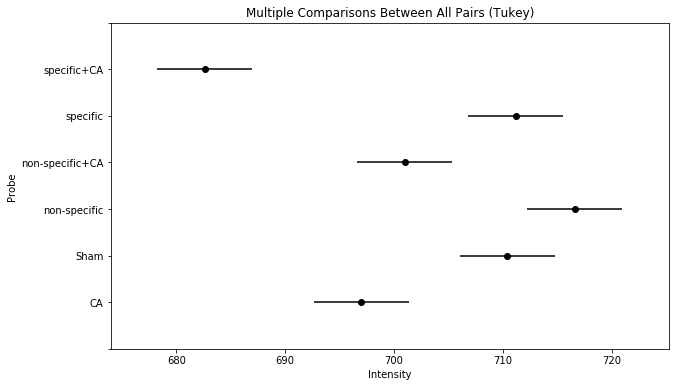

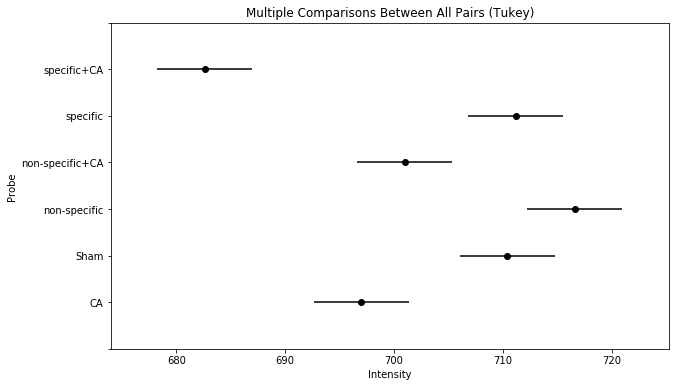

In [95]:
tukey_res.plot_simultaneous(ylabel= "Probe", xlabel= "Intensity")

Note that doing a series of pairwise T test would be possible and there is a function in Python that does just this **allpairtest**.

However, this test will have an increased chance of Type I error: *when you run pair wise comparisons you multiply your chances of type I error for each comparison*. This means that if you were using the 0.05 significance level, the probability that you would make a Type I error on at least one of these comparisons is greater than 0.05. When using Tukey HSD your Type I error will be kept at 0.05.

Note here how the answer could be quite different!

In [96]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['Intensity'], df['Treatment'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind)
 
print("Summary with Tukey HSD:", summary)

print("Summary with all pairwise comparisons:", tbl)

Summary with Tukey HSD:            Multiple Comparison of Means - Tukey HSD,FWER=0.05          
      group1             group2       meandiff  lower    upper   reject
-----------------------------------------------------------------------
      b'CA'             b'Sham'         13.4    4.6689  22.1311   True 
      b'CA'         b'non-specific'     19.6   10.8689  28.3311   True 
      b'CA'        b'non-specific+CA'   4.0    -4.7311  12.7311  False 
      b'CA'           b'specific'       14.2    5.4689  22.9311   True 
      b'CA'          b'specific+CA'    -14.4   -23.1311 -5.6689   True 
     b'Sham'        b'non-specific'     6.2    -2.5311  14.9311  False 
     b'Sham'       b'non-specific+CA'   -9.4   -18.1311 -0.6689   True 
     b'Sham'          b'specific'       0.8    -7.9311   9.5311  False 
     b'Sham'         b'specific+CA'    -27.8   -36.5311 -19.0689  True 
 b'non-specific'   b'non-specific+CA'  -15.6   -24.3311 -6.8689   True 
 b'non-specific'      b'specific'       

When using Tukey HSD we had not rejected the hypothesis that the sham treatment was equivalent to the non-specific probe alone.

However, the pairwise indicates we should reject, and they are possibly different. We have made a Type I error and rejected when we should not. Because of the chance of increased Type I error we made this conclusion, which is not completely accurate.

Note that the larger differences and large conclusion of **the specific probe with contrast agent is significantly different to any other group** is still made. If anything, the pairwise will make us reject more easily, so the risk we run is being excessively sensitive (high Type I error). It is not the best test to use.

## Statistical Power

We can also answer other questions with comparative tests:
1. How sure am I that if I was correct in **not** rejecting the null hypothesis? This would be particularly important if the difference was not significant.
2. How many samples would I have needed if I wanted to detect a specific difference.

These questions are related to the **statistical power** of the test.

It evaluates the likelihood of a type-II error (1-$\beta$) where $\beta$ is the power.

For power calculations we will need to calculate the **effect size**, which is defined differently for ANOVA 

$$\eta^2=\frac{SS_{treatment}}{SS_{treatment}+SS_{error}}$$

Note that in the Python ANOVA the error is named residual

$\eta^2$ is the effect size.

To calculate this effect size we require more information from the test that we can get from the ANOVA we used. There is an alternative Python function for ANOVA in statsmodels that we can use.

In [106]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('Intensity ~ Treatment',df).fit()
    
anovaResults =  anova_lm(model, typ=1)

# This code will add a column to those results calculating the EtaSquare
esq_sm = anovaResults['sum_sq'][0]/(anovaResults['sum_sq'][0]+anovaResults['sum_sq'][1])
anovaResults['EtaSq'] = [esq_sm, 'NaN']

print(anovaResults)

             df       sum_sq     mean_sq          F        PR(>F)     EtaSq
Treatment   5.0  3815.066667  763.013333  38.278261  1.128752e-10  0.888575
Residual   24.0   478.400000   19.933333        NaN           NaN       NaN


With the effect size $\eta^2$ we can now use a function in Python for an ANOVA Power test. Note that it will require the number of observations:

$$ Observations = Treatments \times Repetitions$$

In [107]:
# Let's answer question 1: what is the power of my test? This is not really necessary as we know the samples are different
# but it will give an idea of how to do this calculation

# Estimate power
from statsmodels.stats.power import FTestAnovaPower
from statsmodels.stats.power import FTestPower

nobs1 = 30  #total number of observations (5x6 treatments = 30)
alpha = 0.05  #we are testing for a 5% alpha (p<0.05)
groups = 6 #we have a total of 6 treatments

# The most typical calculation of the effect is given by the difference of the means normalized by a pooled std deviation

# The pooled std deviation is obtained by:
n1=n2=nobs1
effect = esq_sm

# perform power analysis
analysis = FTestAnovaPower()
result = analysis.power(effect_size=effect, nobs=nobs1, alpha=alpha, k_groups=groups)  
print('Power of the Test Beta is : ', result)

Power of the Test Beta is :  0.9388522266388052


In [109]:
# The same result can be obtained with a different test on FPower, but note you need to enter the degrees of freedom
# which you have from your ANOVA table 
analysis = FTestPower()
result = analysis.power(effect_size=effect, df_num=24, df_denom=5, alpha=alpha)
print('Power of the Test Beta is : ', result)

Power of the Test Beta is :  0.9388522266388052


Telling us that the power of this test was 93.9%
If we had not found a difference there is a 6.1% chance that we are mistaken.

To determine the best sample size to achieve a specific power we can now use the **solve_power** function.

In [20]:
# Let's answer question 2: what is the sample size that I need to detect a similar difference in means with the pooled 
# standard deviation that we have observed from previous experiments but a power of 90%?

# Estimate sample size via power analysis

alpha = 0.05
power = 0.90

# perform sample analysis
# note if is easier to use the function that does not require degrees of freedom but both should work

analysis = FTestAnovaPower()
result = analysis.solve_power(effect_size=effect, nobs=None, alpha=alpha, k_groups=6, power=power)
print('Total Minimum Number of Observations : %.3f' % result)
samplesize = np.round(result/6)
print('Sample size for 6 groups : %d' % samplesize)

Total Minimum Number of Observations : 27.027
Sample size for 6 groups : 5


We still need to have 5 samples per group to achieve 90% power, which was expected as the power was already close to that value.

## Activity 3: run the calculations for higher power and lower type-I error to determine samples needed  if you wanted to be more stringent

## Activity 4: evaluate the minimum of samples required for an 80% power and compare with the ROC discussed in lecture

## Activity 5: code the same evaluation using FTestPower()

## Summary

In this example:

1. We applied boxplot and normality plots and tests to ensure applicability of multifactor comparative tests 
2. We introduced the concept of multifactor comparative tests on normal populations using analysis of variance (ANOVA)
3. We analysed the results from an ANOVA test for multi-factor
4. We analysed the results from a multicomparison after ANOVA for a group of factors
5. We analysed the concept of statistical power and sample size for ANOVA tests

References
---------------

* Montgomery, Douglas C. "Design and analysis of experiments. John Wiley & Sons." Inc., New York 1997 (2001).